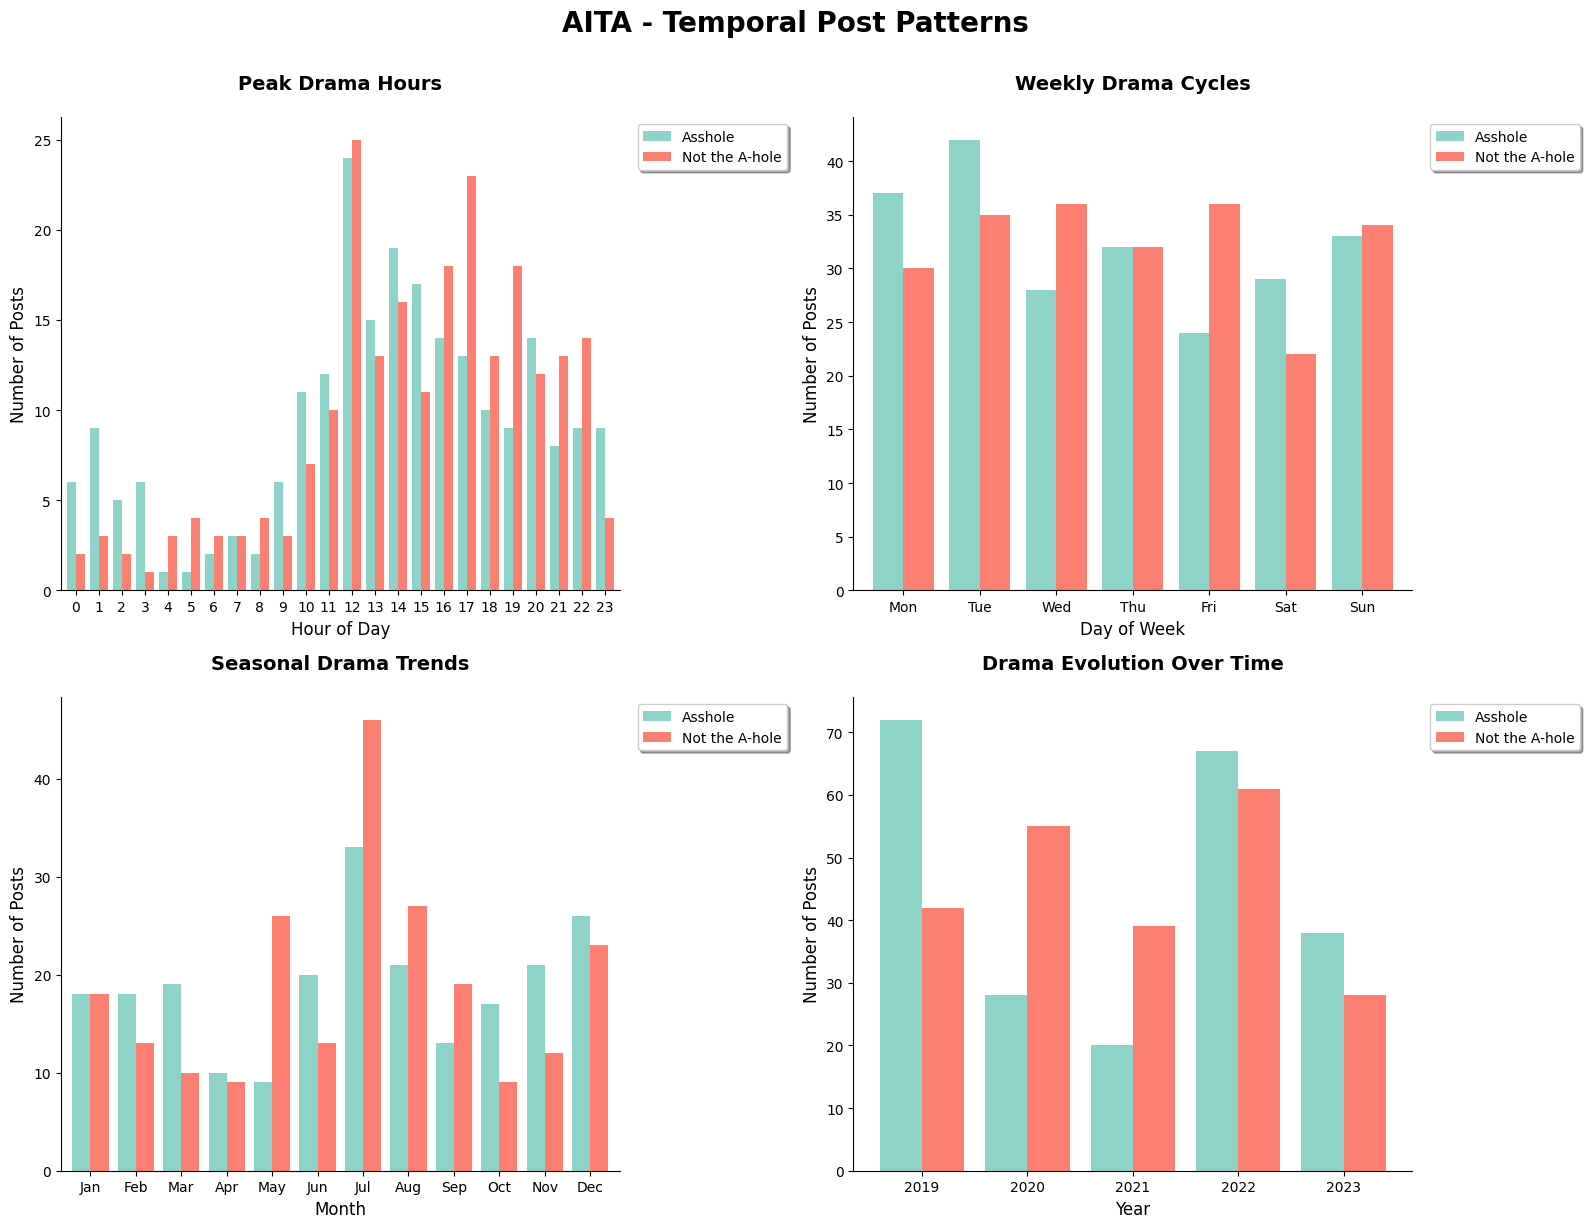

In [35]:
import calendar
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

colors = ['#8dd3c7', '#fb8072']

# Load data
url = "https://raw.githubusercontent.com/Emirhankayar/AITA-mood-swings/main/top450-aita-balanced-comments.csv"
df = pd.read_csv(url, on_bad_lines='skip')
df['created_time'] = pd.to_datetime(df['created_time'], errors='coerce')
df = df[['created_time', 'flair']].dropna().set_index('created_time')

# Extract time
df['hour'] = df.index.hour
df['day_of_week'] = df.index.dayofweek
df['day_of_month'] = df.index.day
df['month'] = df.index.month
df['year'] = df.index.year

# Figs
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('AITA - Temporal Post Patterns', fontsize=20, fontweight='bold', y=1.02)

# Hourly patterns
hourly = df.groupby(['hour', 'flair']).size().unstack(fill_value=0)
hourly.plot(kind='bar', ax=axes[0,0], width=0.8, color=colors)
axes[0,0].set_title('Peak Drama Hours', fontsize=14, fontweight='bold', pad=20)
axes[0,0].set_xlabel('Hour of Day', fontsize=12)
axes[0,0].set_ylabel('Number of Posts', fontsize=12)
axes[0,0].tick_params(axis='x', rotation=0)
axes[0,0].grid(False)

# Daily patterns
daily = df.groupby(['day_of_week', 'flair']).size().unstack(fill_value=0)
day_names = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
daily.index = day_names
daily.plot(kind='bar', ax=axes[0,1], width=0.8, color=colors)
axes[0,1].set_title('Weekly Drama Cycles', fontsize=14, fontweight='bold', pad=20)
axes[0,1].set_xlabel('Day of Week', fontsize=12)
axes[0,1].set_ylabel('Number of Posts', fontsize=12)
axes[0,1].tick_params(axis='x', rotation=0)
axes[0,1].grid(False)

# Monthly patterns
monthly = df.groupby(['month', 'flair']).size().unstack(fill_value=0)
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
monthly.index = [month_names[i-1] for i in monthly.index]
monthly.plot(kind='bar', ax=axes[1,0], width=0.8, color=colors)
axes[1,0].set_title('Seasonal Drama Trends', fontsize=14, fontweight='bold', pad=20)
axes[1,0].set_xlabel('Month', fontsize=12)
axes[1,0].set_ylabel('Number of Posts', fontsize=12)
axes[1,0].tick_params(axis='x', rotation=0)
axes[1,0].grid(False)

# Yearly trends
yearly = df.groupby(['year', 'flair']).size().unstack(fill_value=0)
yearly.plot(kind='bar', ax=axes[1,1], width=0.8, color=colors)
axes[1,1].set_title('Drama Evolution Over Time', fontsize=14, fontweight='bold', pad=20)
axes[1,1].set_xlabel('Year', fontsize=12)
axes[1,1].set_ylabel('Number of Posts', fontsize=12)
axes[1,1].tick_params(axis='x', rotation=0)
axes[1,1].grid(False)

for ax in axes.flat:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.legend(frameon=True, fancybox=True, shadow=True,
              bbox_to_anchor=(1.02, 1), loc='upper left')

plt.tight_layout()
plt.subplots_adjust(top=0.93)
plt.show()

In [36]:
print("\nHistogram Analysis Stats:")
print(f" Total posts: {len(df):,}")
print(f" Date range: {df.index.min().strftime('%Y-%m-%d')} to {df.index.max().strftime('%Y-%m-%d')}")
print(f" Most active hour: {hourly.sum(axis=1).idxmax()}:00")
print(f" Most active day: {daily.sum(axis=1).idxmax()}")
print(f" Peak month: {monthly.sum(axis=1).idxmax()}")


Histogram Analysis Stats:
 Total posts: 450
 Date range: 2019-01-04 to 2023-11-18
 Most active hour: 12:00
 Most active day: Tue
 Peak month: Jul


In [37]:
url = "https://raw.githubusercontent.com/Emirhankayar/AITA-mood-swings/main/top450-aita-balanced-comments.csv"
df = pd.read_csv(url, on_bad_lines='skip')
df['created_time'] = pd.to_datetime(df['created_time'], errors='coerce')

def analyze_comments(df):
    df['all_authors'] = df.apply(lambda row:
        (row['level1_authors'] or []) +
        (row['level2_authors'] or []) +
        (row['level3_authors'] or []), axis=1)

    df['all_bodies'] = df.apply(lambda row:
        (row['level1_bodies'] or []) +
        (row['level2_bodies'] or []) +
        (row['level3_bodies'] or []), axis=1)

    df['comments_by_users'] = df.apply(lambda row:
        sum(1 for a in row['all_authors'] if a and a != row['author']), axis=1)

    df['total_comment_length'] = df['all_bodies'].apply(lambda bodies:
        sum(len(str(comment)) for comment in bodies if comment))

    return df

df_analyzed = analyze_comments(df)

grouped = df_analyzed.groupby('flair')[['comments_by_users', 'total_comment_length']].mean().dropna()

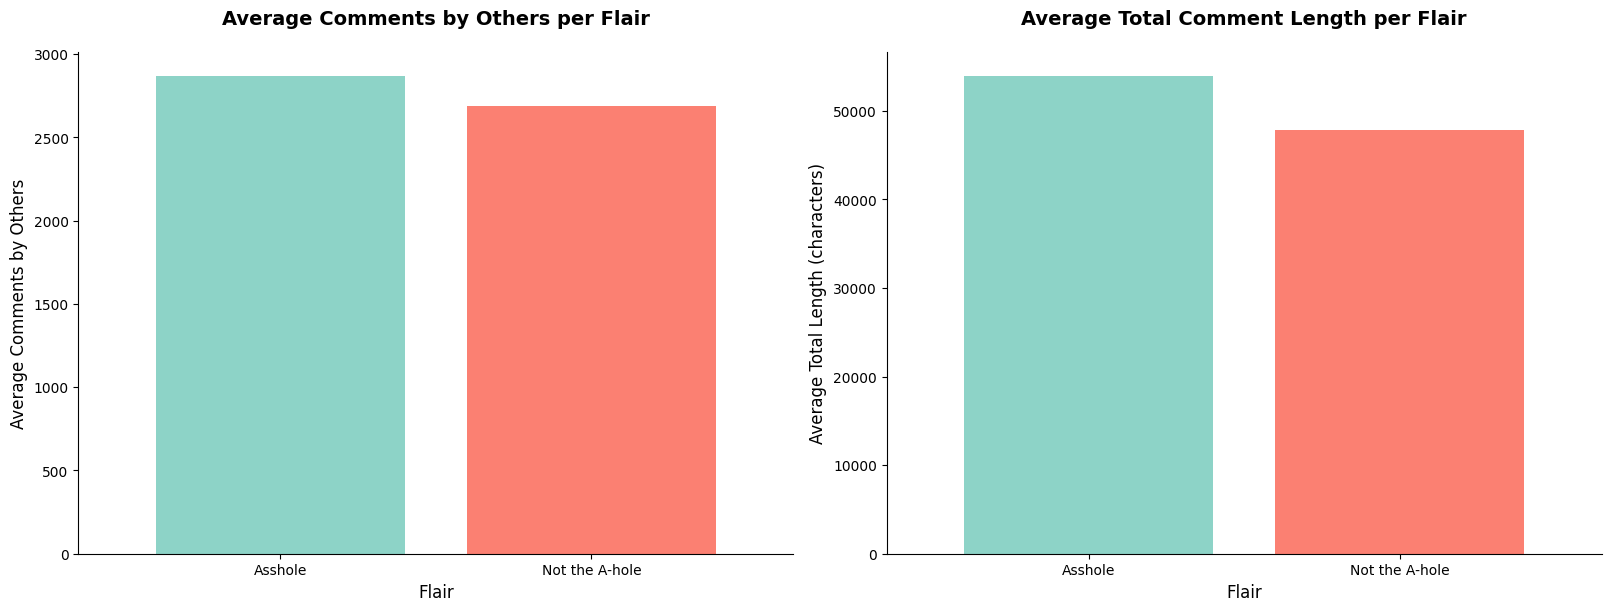

In [38]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6), constrained_layout=True)

# Comments by users
grouped['comments_by_users'].plot(kind='bar', ax=axes[0], width=0.8, color=[colors[0], colors[1]])
axes[0].set_title('Average Comments by Others per Flair', fontsize=14, fontweight='bold', pad=20)
axes[0].set_xlabel('Flair', fontsize=12)
axes[0].set_ylabel('Average Comments by Others', fontsize=12)
axes[0].tick_params(axis='x', rotation=0)
axes[0].grid(False)

# Total comment length
grouped['total_comment_length'].plot(kind='bar', ax=axes[1], width=0.8, color=[colors[0], colors[1]])
axes[1].set_title('Average Total Comment Length per Flair', fontsize=14, fontweight='bold', pad=20)
axes[1].set_xlabel('Flair', fontsize=12)
axes[1].set_ylabel('Average Total Length (characters)', fontsize=12)
axes[1].tick_params(axis='x', rotation=0)
axes[1].grid(False)

for ax in axes:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

plt.show()

In [39]:
print("\nComment Analysis Stats:")
print(f" Total posts analyzed: {len(df_analyzed):,}")
print(f" Average comments by others: {grouped['comments_by_users'].mean():.1f}")
print(f" Average total comment length: {grouped['total_comment_length'].mean():.0f} characters")
print(f" Most discussed flair: {grouped['comments_by_users'].idxmax()}")
print(f" Longest discussions flair: {grouped['total_comment_length'].idxmax()}")


Comment Analysis Stats:
 Total posts analyzed: 450
 Average comments by others: 2778.1
 Average total comment length: 50892 characters
 Most discussed flair: Asshole
 Longest discussions flair: Asshole


In [40]:
## We merge, in order to get timestamps for posts

# Main data
main_url = "https://raw.githubusercontent.com/Emirhankayar/AITA-mood-swings/main/top450-aita-balanced-comments.csv"
df = pd.read_csv(main_url, on_bad_lines='skip')

# Sentiment Data
sentiment_url = "https://raw.githubusercontent.com/Emirhankayar/AITA-mood-swings/main/comments_with_bert.csv"
comments_df = pd.read_csv(sentiment_url, on_bad_lines='skip')

# Merge
sub_times = df[["submission_id", "created_time"]].drop_duplicates()
comments_df = comments_df.merge(sub_times, on="submission_id", how="left")

In [41]:
data = df = comments_df.groupby(['submission_id', 'flair', 'created_time']).agg({
        'afinn': 'mean',
        'ncrlex': 'mean',
        'vader': 'mean',
        'bert_score': 'mean'
}).reset_index()

sentiment_metrics = [
        ('afinn', 'AFINN'),
        ('vader', 'VADER'),
        ('ncrlex', 'NCRLex'),
        ('bert_score', 'BERT')]

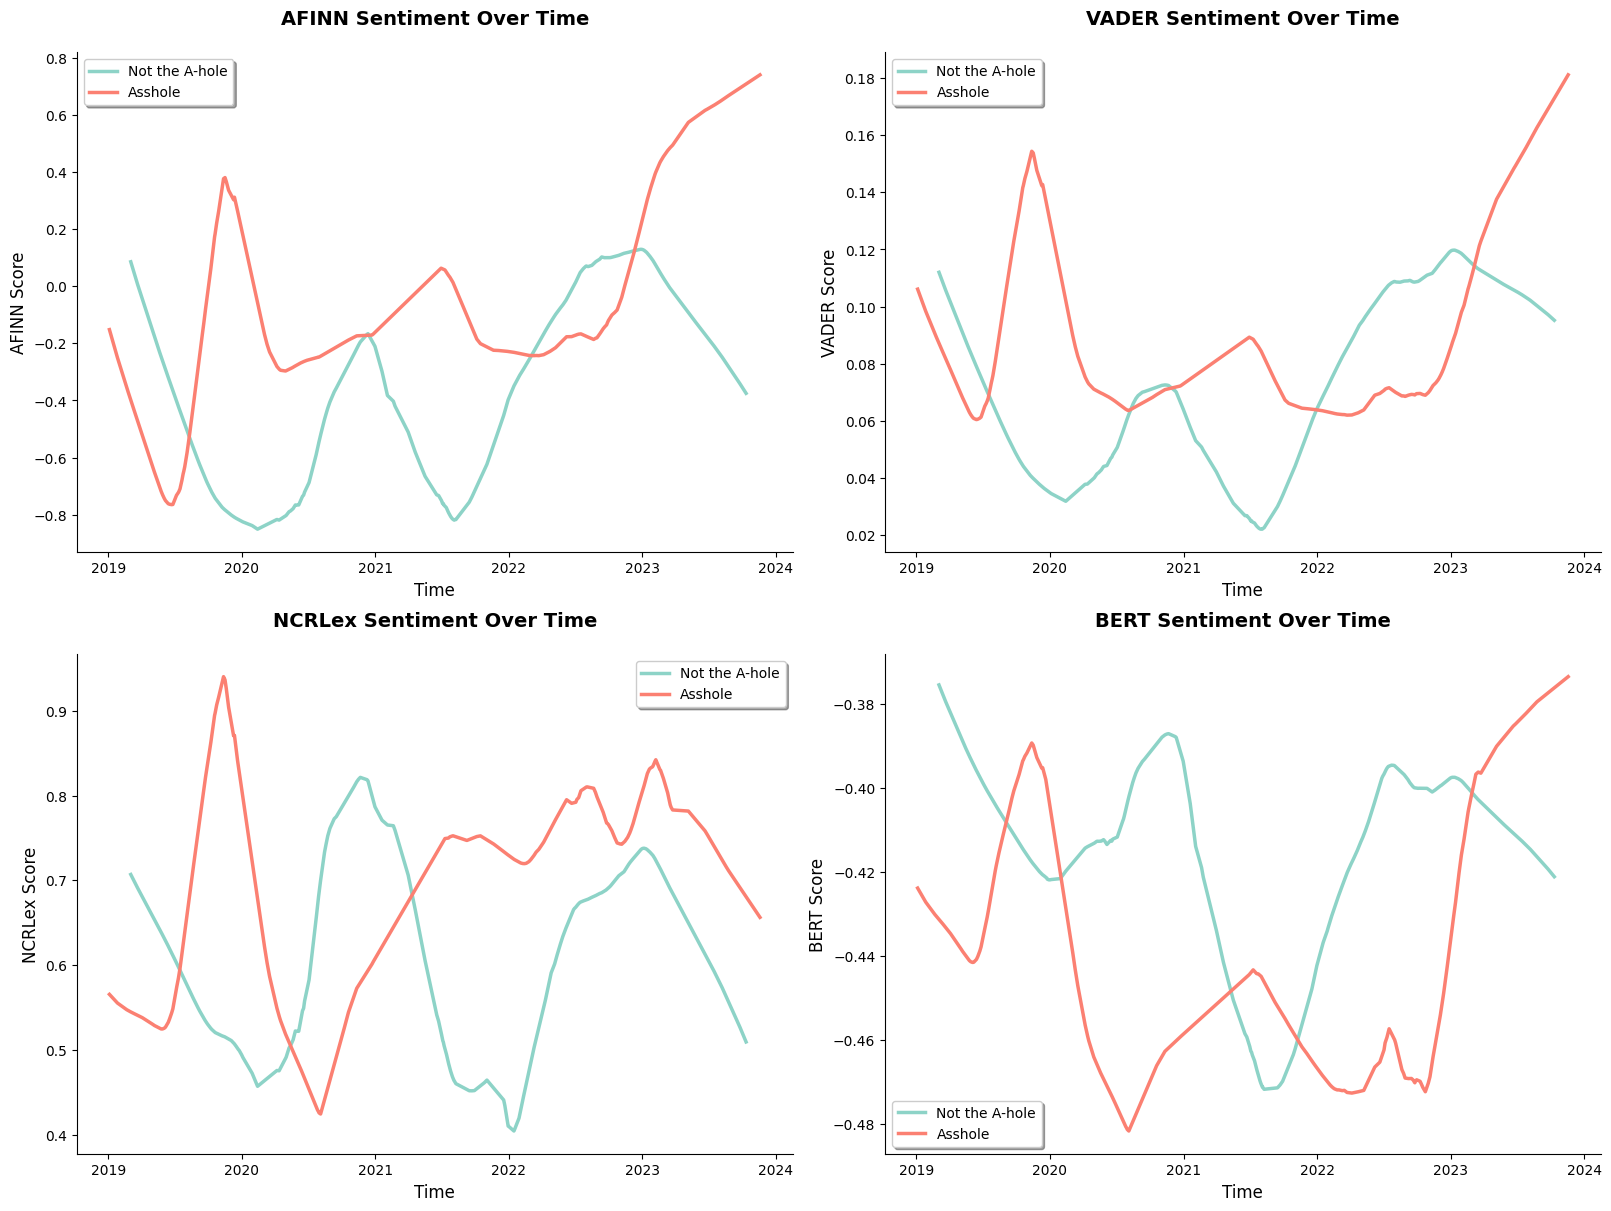

In [42]:
import numpy as np
from statsmodels.nonparametric.smoothers_lowess import lowess

fig, axes = plt.subplots(2, 2, figsize=(16, 12), constrained_layout=True)
axes = axes.flatten()

for idx, (col, title) in enumerate(sentiment_metrics):
  ax = axes[idx]
  for i, flair in enumerate(data['flair'].unique()):
    flair_data = data[data['flair'] == flair].sort_values('created_time')

    x_numeric = pd.to_datetime(flair_data['created_time']).astype(np.int64) // 10**9
    y = flair_data[col].values

    # Apply smoothing
    smoothed = lowess(y, x_numeric, frac=0.3)

    ax.plot(pd.to_datetime(smoothed[:, 0], unit='s'), smoothed[:, 1],
    label=flair, color=colors[i], linewidth=2.5)

    ax.set_title(f'{title} Sentiment Over Time', fontsize=14, fontweight='bold', pad=20)
    ax.set_xlabel('Time', fontsize=12)
    ax.set_ylabel(f'{title} Score', fontsize=12)
    ax.tick_params(axis='x', rotation=0)
    ax.grid(False)
    ax.legend(frameon=True, fancybox=True, shadow=True)

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

plt.show()

In [43]:
print("\nSentiment Analysis Stats:")
for col in ['afinn', 'vader', 'ncrlex', 'bert_score']:
  print(f"\n {col.upper()} scores:")
  for flair in data['flair'].unique():
    flair_mean = data[data['flair'] == flair][col].mean()
    print(f"   {flair}: {flair_mean:.3f}")


Sentiment Analysis Stats:

 AFINN scores:
   Not the A-hole: -0.477
   Asshole: -0.141

 VADER scores:
   Not the A-hole: 0.064
   Asshole: 0.083

 NCRLEX scores:
   Not the A-hole: 0.637
   Asshole: 0.703

 BERT_SCORE scores:
   Not the A-hole: -0.400
   Asshole: -0.427
